In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [36]:
df = pd.read_csv('df_clasificacion_dataproject.csv', index_col = 0)
df.head()

,HORAS_ESTUDIO_SEMANAL,NOTA_ANTERIOR,TASA_ASISTENCIA,HORAS_SUENO,EDAD,NIVEL_DIFICULTAD,TIENE_TUTOR,HORARIO_ESTUDIO_PREFERIDO,ESTILO_APRENDIZAJE,NOTA_FINAL,APROBADO
0,0.331561,0.269009,0.833002,0.445949,0.636364,1.000000,1.0,0.463128,1.000000,0.777143,1.0
1,0.418439,0.726082,0.793121,0.102807,0.000000,0.000000,0.0,0.463128,0.000000,0.600000,1.0
2,0.146282,0.862624,0.682795,0.625874,0.636364,1.000000,0.0,0.561063,1.000000,0.714286,1.0
3,0.235301,0.741118,0.785623,0.765471,0.454545,1.000000,0.0,1.000000,0.465920,0.688571,1.0
4,0.000000,0.517917,0.431749,0.445307,0.272727,0.825975,0.0,1.000000,0.758538,0.514286,1.0


In [37]:
tv = 'APROBADO'
X = df.drop(columns=[tv])
y = df[tv]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (800, 10)
Tamaño del conjunto de prueba: (200, 10)


In [39]:
modelo = LogisticRegression(penalty='l2', C=1.0,  max_iter=200)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [40]:
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

## Validacion

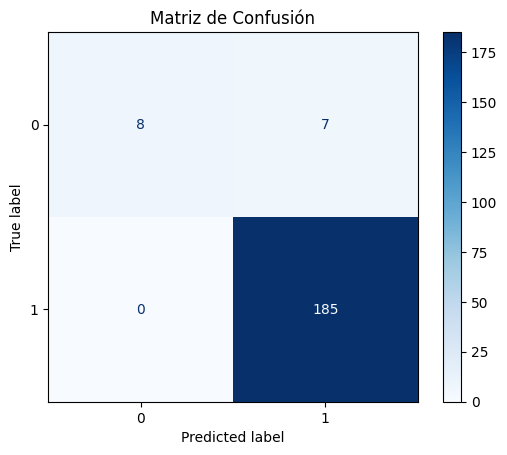

In [41]:
matriz = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Matriz de Confusión')
plt.show()

### Metricas

In [42]:
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

y_train_proba = modelo.predict_proba(X_train)
y_test_proba = modelo.predict_proba(X_test)

In [43]:
metricas = {
    "train": {
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred),
        "Recall": recall_score(y_train, y_train_pred),
        "F1-score": f1_score(y_train, y_train_pred),
    },
    "test": {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1-score": f1_score(y_test, y_test_pred),
    },
}

In [44]:
df_metricas = pd.DataFrame(metricas).T

In [45]:
df_metricas.round(2)

,Accuracy,Precision,Recall,F1-score
train,0.92,0.92,1.0,0.96
test,0.96,0.96,1.0,0.98


In [46]:
balanceo_metricas = {
    "train": {
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred, average="weighted"),
        "Recall": recall_score(y_train, y_train_pred, average="weighted"),
        "F1-score": f1_score(y_train, y_train_pred, average="weighted"),
    },
    "test": {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred, average="weighted"),
        "Recall": recall_score(y_test, y_test_pred, average="weighted"),
        "F1-score": f1_score(y_test, y_test_pred, average="weighted"),
    },
}

In [47]:
df_balanceo_metricas = pd.DataFrame(balanceo_metricas).T
df_balanceo_metricas.round(2)

,Accuracy,Precision,Recall,F1-score
train,0.92,0.93,0.92,0.90
test,0.96,0.97,0.96,0.96


In [48]:
coef_df = pd.DataFrame({'Feature': X.columns.to_list(), 'Coefficient': modelo.coef_[0]})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False, key=abs)

In [49]:
coef_df.sort_values(by='Coefficient', ascending=False, key=abs)

,Feature,Coefficient
9,NOTA_FINAL,7.742906
0,HORAS_ESTUDIO_SEMANAL,1.842687
1,NOTA_ANTERIOR,1.427765
2,TASA_ASISTENCIA,0.827728
7,HORARIO_ESTUDIO_PREFERIDO,0.699032
5,NIVEL_DIFICULTAD,0.694620
8,ESTILO_APRENDIZAJE,0.473109
3,HORAS_SUENO,0.213458
4,EDAD,-0.191680
6,TIENE_TUTOR,0.037693


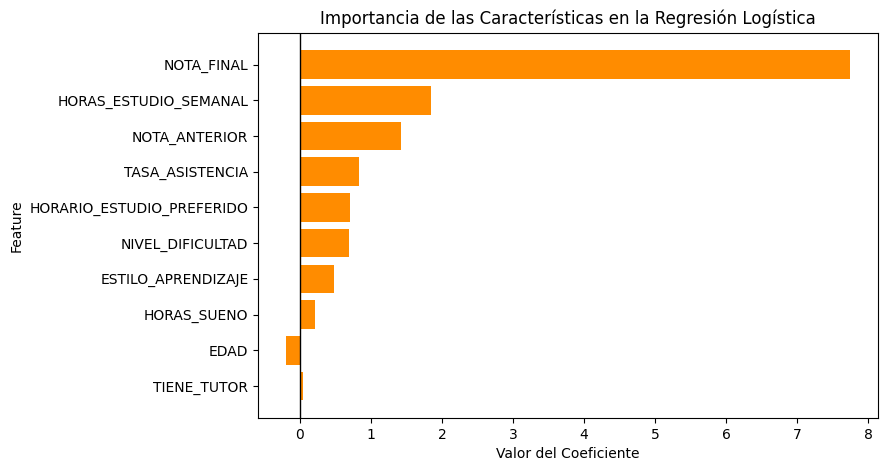

In [50]:
plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='darkorange')
plt.xlabel("Valor del Coeficiente")
plt.ylabel("Feature")
plt.title("Importancia de las Características en la Regresión Logística")
plt.axvline(0, color='black', linewidth=1)  # Línea en el 0 para referencia
plt.gca().invert_yaxis()  # Invertir eje para que la más importante esté arriba
plt.show()

In [51]:
import joblib

# Entrenar el modelo con todo el conjunto de datos
modelo_final = LogisticRegression(penalty='l2', C=1.0,  max_iter=200,  n_jobs=-1)
modelo_final.fit(X, y)

# Guardar el modelo entrenado para producción
joblib.dump(modelo_final, "modelo_clasificacion.pkl")

['modelo_clasificacion.pkl']

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [53]:
models = {
    "Logistic (L2 - Ridge)": LogisticRegression(penalty='l2', C=1.0, solver='liblinear'),
    "Logistic (L1 - Lasso)": LogisticRegression(penalty='l1', C=0.1, solver='liblinear'),
    "Logistic (ElasticNet)": LogisticRegression(penalty='elasticnet', C=0.1, l1_ratio=0.5, solver='saga'),
}

In [54]:
metrics_results = {}

In [63]:
for name, model in models.items():
    model.fit(X_train, y_train) 

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics_results[name] = {
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Train Precision (Balanceado)": precision_score(y_train, y_train_pred, average='weighted',zero_division=1),
        "Train Recall (Balanceado)": recall_score(y_train, y_train_pred, average='weighted'),
        "Train F1 (Balanceado)": f1_score(y_train, y_train_pred, average='weighted'),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Test Precision (Balanceado)": precision_score(y_test, y_test_pred, average='weighted',zero_division=1),
        "Test Recall (Balanceado)": recall_score(y_test, y_test_pred, average='weighted'),
        "Test F1 (Balanceado)": f1_score(y_test, y_test_pred, average='weighted'),
    }

In [64]:
df_metrics = pd.DataFrame(metrics_results).T
df_metrics.round(2)

,Train Accuracy,Train Precision (Balanceado),Train Recall (Balanceado),Train F1 (Balanceado),Test Accuracy,Test Precision (Balanceado),Test Recall (Balanceado),Test F1 (Balanceado)
Logistic (L2 - Ridge),0.91,0.92,0.91,0.88,0.96,0.96,0.96,0.95
Logistic (L1 - Lasso),0.89,0.90,0.89,0.84,0.92,0.93,0.92,0.89
Logistic (ElasticNet),0.89,0.90,0.89,0.84,0.92,0.93,0.92,0.89
